<a href="https://colab.research.google.com/github/Adigozalovh/Machine-Learning/blob/main/Classification101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml(data_id=554, as_frame=False) # False olanda numpy array, True olanda pandas dataframe kimi netice verir

In [4]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
X = mnist['data']
y = mnist['target']

In [6]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
X[0].shape

(784,)

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X.shape # 70k sekil her biri 784 pixel

(70000, 784)

In [10]:
X[0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
import matplotlib.pyplot as plt

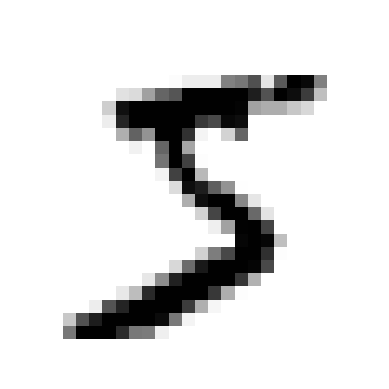

In [12]:
def digit_image(num_image):
  num_image_reshaped = num_image.reshape(28,28)
  plt.imshow(num_image_reshaped, cmap= 'binary') # imshow() matrisden sekili gosterir, imread() ise sekili matrise cevirir
  plt.axis('off')

some_digit = X[0]
digit_image(some_digit)

In [13]:
y[0]

'5'

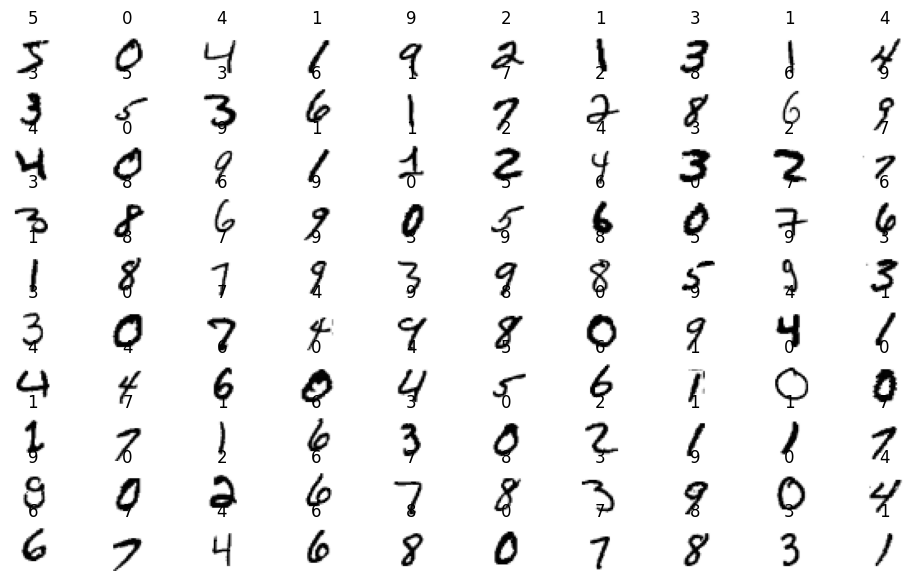

In [14]:
plt.figure(figsize=(12,7))
for idx,image in enumerate(X[:100]): #enumerate - hem indexi hem indexin qarsindakini qaytarir meselcun 1-ci Hesen, 2-ci Huseyn
  plt.subplot(10, 10, idx+1) #indexin uzerine 1 gel ve hemin yere sekili qoy
  digit_image(image)
  plt.title(y[idx]) # iki cur AI error var: Insan xetasi, Baes xetasi

In [15]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [16]:
#Multi label classification - oglandir ve boyu hundurdur;
#Multi classification,
#Binary classification - 2 dene class var,
#Multi class classification - coxlu klaslar var,
#Multi output classification - Remini kimi

In [17]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [19]:
sgd_clf = SGDClassifier(random_state=42)

In [20]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
cross_val_score(sgd_clf,X_train, y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [22]:
t = [0.95035, 0.96035, 0.9604 ]
np.mean(t)

np.float64(0.9570333333333334)

In [23]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [25]:
1 - (sum(y_train=='5') / len(y_train))

np.float64(0.90965)

In [26]:
from sklearn.dummy import DummyClassifier # 90% False oldugu ucun hamisina False deyir ve buna gore 90% netice alir

In [27]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict(X_train)) #any - icinden 1 denesi de True olsa True qaytaracaq

False

In [28]:
dummy_clf.score(X_train,y_train_5)

0.90965

In [29]:
# Precision - modelin dogrudur dediklerinden necesi heqiqeten dogrudur(% olaraq);
# Recall - butun dogrularin necesine model dogrudur deyib;
# Accuracy - nece dene dogruya dogru, nece dene sehve sehv deyib;
# Harmonik ortalama(F1 score) - 2/(1/precision) + (1/Recall)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [31]:
preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
preds

array([ True, False, False, ...,  True, False, False])

In [32]:
cm = confusion_matrix(y_train_5, preds)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [34]:
precision_score(y_train_5,preds) * 100

83.70879772350011

In [35]:
recall_score(y_train_5, preds) * 100

65.11713705958311

In [36]:
f1_score(y_train_5, preds) * 100

73.25171197343847

In [37]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [38]:
treshold = 0
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([ True])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [40]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [41]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [42]:
tresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [43]:
sum((y_scores > 0) == y_train_5) / len(y_train_5)

np.float64(0.9570333333333333)

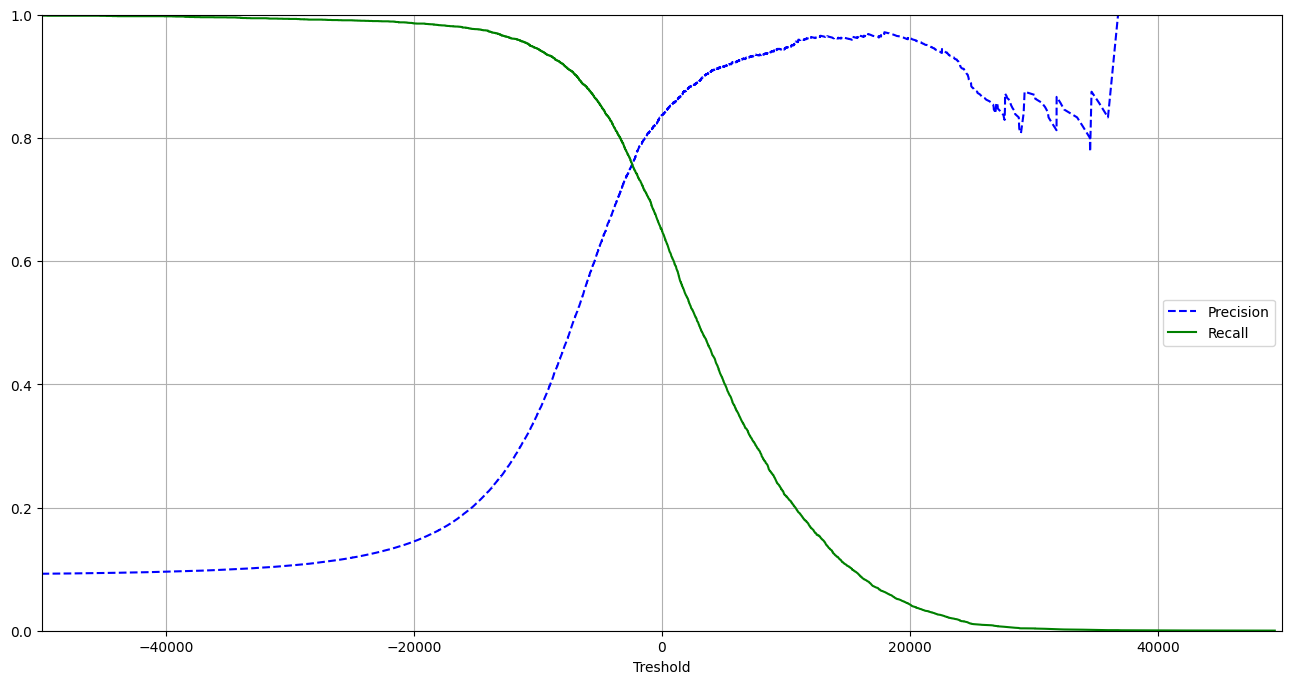

In [44]:
plt.figure(figsize=(16,8))
plt.plot(tresholds, precisions[:-1], 'b--', label = 'Precision')
plt.plot(tresholds,recalls[:-1], 'g-', label='Recall')

plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc = 'center right');

In [45]:
idx_for_90_precision = (precisions > 0.90).argmax()
treshold_for_90_precision = tresholds[idx_for_90_precision]
treshold_for_90_precision

np.float64(3370.0194991439557)

In [46]:
idx_for_equal_precision = (precisions == recalls).argmax()
treshold_for_precision = tresholds[idx_for_equal_precision]
treshold_for_precision

np.float64(-2379.064500932274)

In [47]:
precisions[idx_for_equal_precision], recalls[idx_for_equal_precision]

(np.float64(0.7572403615569083), np.float64(0.7572403615569083))

In [48]:
y_train_pred_90 = (y_scores >= treshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [49]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [50]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

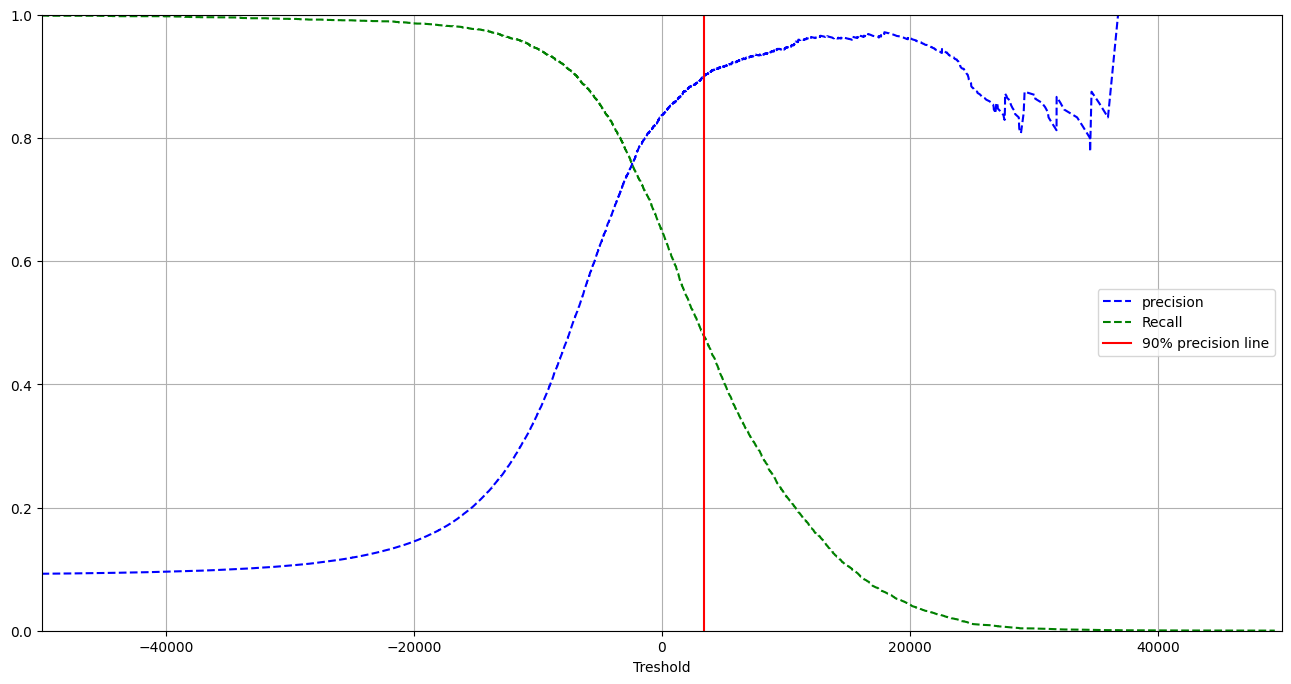

In [51]:
plt.figure(figsize=(16,8))
plt.plot(tresholds, precisions[:-1], 'b--', label = "precision")
plt.plot(tresholds, recalls[:-1], 'g--', label = 'Recall')

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.axvline(x = treshold_for_90_precision, ymin = 0, ymax=1, color = 'r' , label = '90% precision line')
plt.legend(loc = 'center right');

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

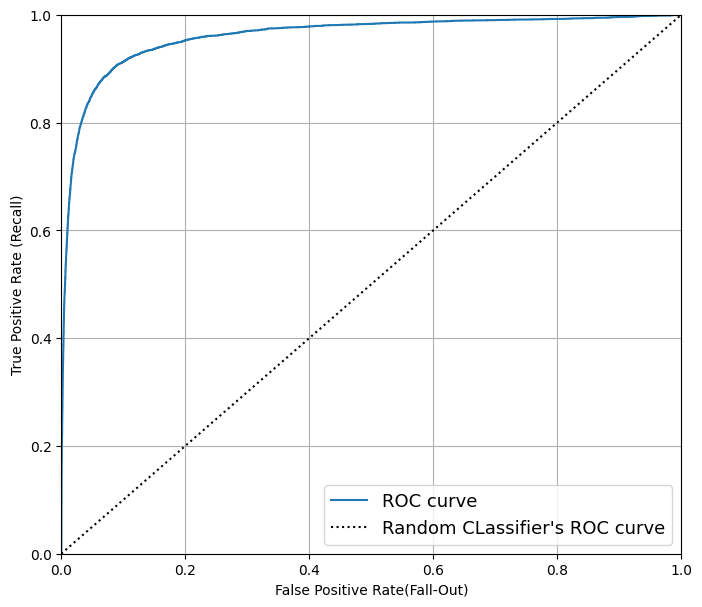

In [53]:
plt.figure(figsize=(8,7))
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1], [0,1], 'k:', label = "Random CLassifier's ROC curve")

plt.xlabel('False Positive Rate(Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc='lower right', fontsize = 13);


In [54]:
pd.value_counts(y)

/tmp/ipython-input-3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


,count
1,7877
7,7293
3,7141
2,6990
9,6958
0,6903
6,6876
8,6825
4,6824
5,6313


In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y_train_5 , y_scores)

np.float64(0.9604938554008616)

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state= 42)

In [58]:
y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    method = 'predict_proba')

In [59]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [60]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest,tresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

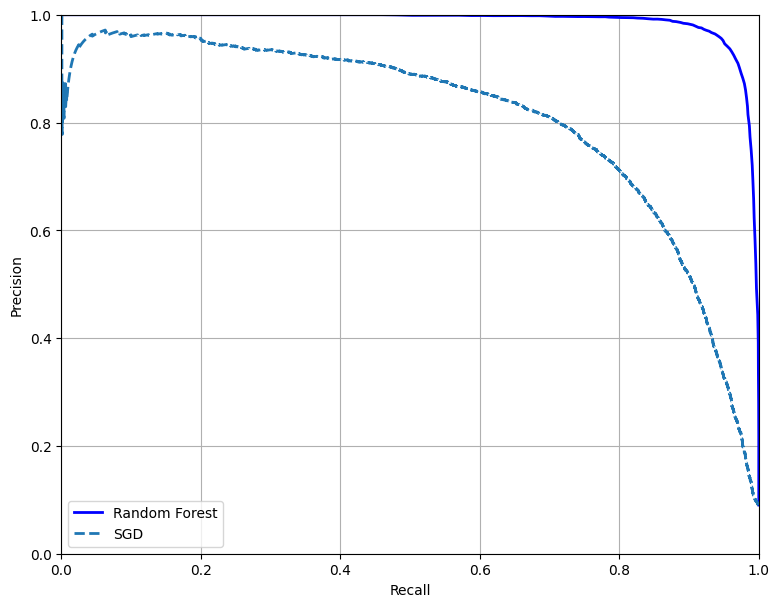

In [61]:
plt.figure(figsize = (9,7))

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label= 'Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc= 'lower left');

In [62]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5 , y_train_pred_forest)

0.9274509803921569

In [63]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [64]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

### MultiCLass Classification

OvA or OvR ---> One versus all or One versus rest ; en yaxshi skoru goturur

OvO --> One versus One --> hamisini bir biri ile muqayise edir ve her biri ucun bir binary classification duzeldir

In [65]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [66]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [67]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [68]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [69]:
svm_clf.classes_[class_id]

'5'

In [70]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

### One Versus Rest

In [71]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [72]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [73]:
len(ovr_clf.estimators_)

10

In [74]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

sgd classifier pixelleri bir birine vurdugundan bu ish ucun cox da mukemmel deyil

In [75]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [76]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

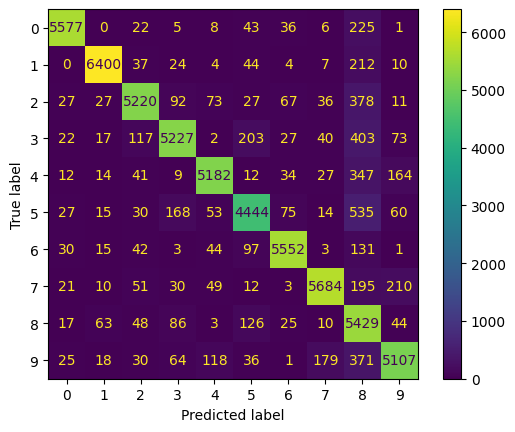

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [78]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = 'true', values_format = '.0%')
plt.show()

###  Multilabel CLassification

In [80]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train.astype('int8') >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [81]:
knn_clf.predict(X_train[:3])

array([[False,  True],
       [False, False],
       [False, False]])

In [82]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [91]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

0.9764102655606048

### MultiOutput Classification

In [86]:
import random
np.random.seed(42)
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test +  noise
y_train_mod = X_train
y_test_mod = X_test

In [87]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

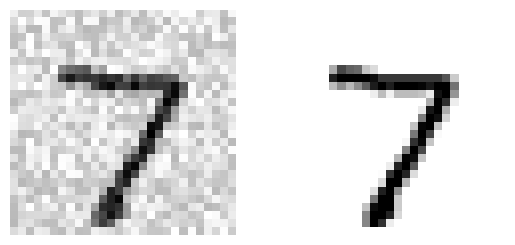

In [88]:
plt.subplot(121);
digit_image(X_test_mod[0])
plt.subplot(122);
digit_image(y_test_mod[0])
plt.show()

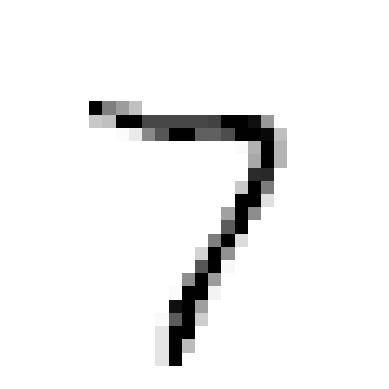

In [89]:
knn_clf  = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)
cleaned_pic = knn_clf.predict([X_test_mod[0]])

digit_image(cleaned_pic)

In [90]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688